In [61]:
library(qvalue)
library(dplyr)

In [76]:
Giordanos_selection = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/neuro_5CV_filt.tsv"
G_file = read.csv(Giordanos_selection, sep = "\t")
G_file$gene = G_file$gene_ids.0
nrow(G_file)
head(G_file,2)

[1] 16369

index,gene_ids.0,gene
OR4F5,ENSG00000186092,ENSG00000186092
RP11-34P13.8,ENSG00000239945,ENSG00000239945


In [1]:
# GTEx brain bulk results to assess replication
bulk = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/allBrainAverageSlope.Weigthed.txt.gz"
# res = read.table(gzfile(bulk),sep="\t", header = TRUE)
head(res)

V1,V2,V3
QTL,slope,minPvalueBeta
1_662622_G_A-ENSG00000223972.4,-0.0100299755009276,0.997885800810918
1_693731_A_G-ENSG00000223972.4,0.0396566103896104,1
1_715074_A_G-ENSG00000223972.4,0.155843977736549,0.999999997880452
1_724103_A_G-ENSG00000223972.4,0.294889472170686,1
1_727841_G_A-ENSG00000223972.4,0.0654366432653061,0.821338075249434


In [24]:
res1 = res
res1$V1 = as.character(res1$V1)
res1$V2 = as.character(res1$V2)
res1$V3 = as.character(res1$V3)

In [26]:
colnames(res1) = res1[1,]
res1 = res1[-c(1),] 
head(res1,2)

,QTL,slope,minPvalueBeta
2,1_662622_G_A-ENSG00000223972.4,-0.0100299755009276,0.997885800810918
3,1_693731_A_G-ENSG00000223972.4,0.0396566103896104,1


In [27]:
res2 = res1
colnames(res2) = c("eQTL","beta","min_emp_p_value")
head(res2,2)

,eQTL,beta,min_emp_p_value
2,1_662622_G_A-ENSG00000223972.4,-0.0100299755009276,0.997885800810918
3,1_693731_A_G-ENSG00000223972.4,0.0396566103896104,1


In [33]:
res2$snp_id = gsub("-.*","",res2$eQTL)
res2$feature_id = gsub(".*-","",res2$eQTL)
head(res2,2)

,eQTL,beta,min_emp_p_value,snp_id,feature_id
2,1_662622_G_A-ENSG00000223972.4,-0.0100299755009276,0.997885800810918,1_662622_G_A,ENSG00000223972.4
3,1_693731_A_G-ENSG00000223972.4,0.0396566103896104,1,1_693731_A_G,ENSG00000223972.4


In [36]:
res2$feature_id = gsub("\\..*","",res2$feature_id)
head(res2,2)

,eQTL,beta,min_emp_p_value,snp_id,feature_id
2,1_662622_G_A-ENSG00000223972.4,-0.0100299755009276,0.997885800810918,1_662622_G_A,ENSG00000223972
3,1_693731_A_G-ENSG00000223972.4,0.0396566103896104,1,1_693731_A_G,ENSG00000223972


In [ ]:
# res3 = res2[order(as.numeric(res2$min_emp_p_value)),]
# res3 <- res3[-which(duplicated(res3$feature_id)),]

In [81]:
res3 = res3[res3$feature_id %in% G_file$gene,]

In [82]:
res3$q_value = qvalue(as.numeric(res3$min_emp_p_value))$qvalues
head(res3,2)

,eQTL,beta,min_emp_p_value,snp_id,feature_id,q_value
86379614,12_56435929_C_G-ENSG00000197728.5,-0.00670164100380229,4.889872e-59,12_56435929_C_G,ENSG00000197728,1.641675e-56
80070691,11_74618701_C_G-ENSG00000166435.11,0.101580099762738,1.149770e-54,11_74618701_C_G,ENSG00000166435,1.652164e-52


In [83]:
res3$min_emp_p_value = as.numeric(res3$min_emp_p_value)
nrow(res3)

[1] 11652

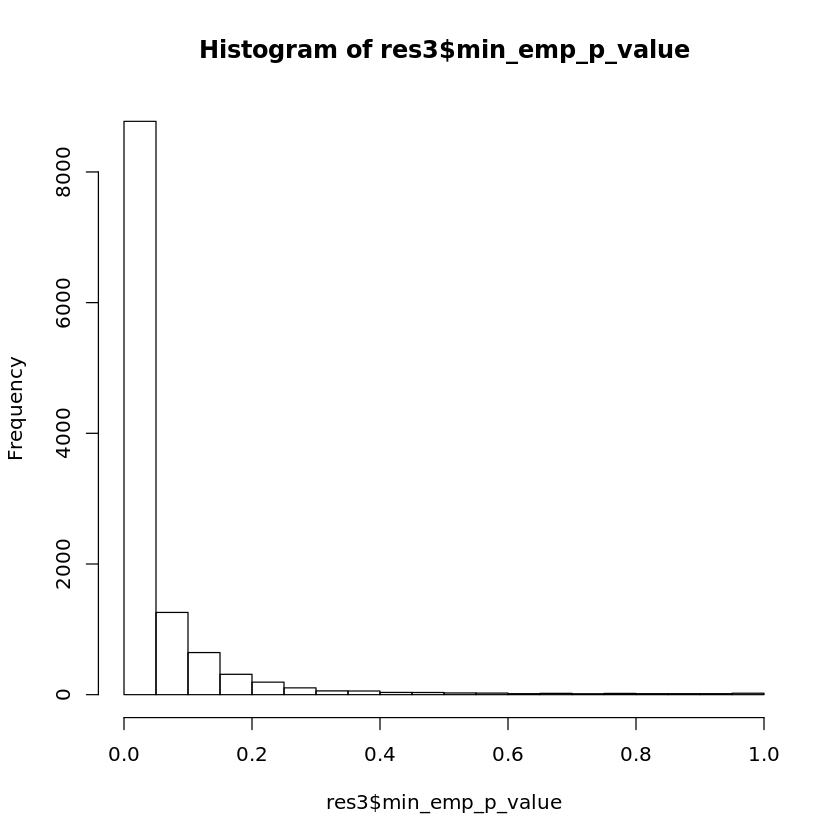

In [92]:
hist(res3$min_emp_p_value)

In [89]:
max_qval = max(res3[res3$q_value < 0.01,'q_value'])
max_qval
emp_pv_star = max(res3[res3$q_value==max_qval,"min_emp_p_value"])
emp_pv_star

[1] 0.009974805

[1] 0.3367425

In [69]:
my_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/results_neuro/"

In [70]:
# mean
df0 = read.csv(paste0(my_folder,"mean_top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [71]:
head(df0,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_45820238_C_G,2.870900e-02,-0.1511366,0.06909228,5.659205e-01,19,45582546,45808541,635,154,1.646269,11.66498,19,45820238,G,1,0.2662338,0.8373805,ENSG00000007047
19_45675873_T_C,6.224806e-05,-0.2838824,0.07089753,8.521794e-05,19,45666186,45681495,635,154,1.329119,41.02144,19,45675873,C,1,0.1493506,0.2008753,ENSG00000007255


In [77]:
# mean_genes = unique(df0$feature_id[df0$feature_id %in% G_file$gene])
# length(mean_genes)
# df1 = df0
# df1 = df0[df0$feature_id %in% G_file$gene,]
# df1 = df0[df0$feature_id %in% common_genes,]
length(unique(df1$feature_id))
# df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = 'BH')
# length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df2 = df1[df1$q_value < 0.05,]
# nrow(df3)

[1] 10598

[1] 3167

In [78]:
df4 = inner_join(df2, res2, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
# head(df4)
df4$beta.sc = as.numeric(df4$beta.sc)
df4$beta.bulk = as.numeric(df4$beta.bulk)
c(nrow(df4[(df4$min_emp_p_value < emp_pv_star & 
         (df4$beta.sc*df4$beta.bulk)>0),]),
  nrow(df4),
  nrow(df4[(df4$min_emp_p_value < emp_pv_star & 
         (df4$beta.sc*df4$beta.bulk)>0),])/nrow(df4))

Warning message:
“Column `snp_id` joining factor and character vector, coercing into character vector”Warning message:
“Column `feature_id` joining factor and character vector, coercing into character vector”

[1] 1.930000e+02 2.832000e+03 6.814972e-02

In [61]:
# total mean
df0 = read.csv(paste0(my_folder,"totmean_top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [62]:
totmean_genes = unique(df0$feature_id[df0$feature_id %in% G_file$gene])
length(totmean_genes)
# df1 = df0
# df1 = df0[df0$feature_id %in% G_file$gene,]
df1 = df0[df0$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = 'BH')
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

# df3 = df1[df1$q_value < 0.05,]
# nrow(df3)

[1] 10598

[1] 10598

[1] 2108

[1] 2660

In [63]:
# median
df0 = read.csv(paste0(my_folder,"median_top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [64]:
median_genes = unique(df0$feature_id[df0$feature_id %in% G_file$gene])
length(median_genes)
# df1 = df0
# df1 = df0[df0$feature_id %in% G_file$gene,]
df1 = df0[df0$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = 'BH')
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

# df3 = df1[df1$q_value < 0.05,]
# nrow(df3)

[1] 5224

[1] 5224

[1] 1919

[1] 1919

In [65]:
# total median
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/Run_Output_PCA20_88_log_TPM_scater_libsize_206_neuro/"
df0 = read.csv(paste0(myfolder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [66]:
totmedian_genes = unique(df0$feature_id[df0$feature_id %in% G_file$gene])
length(totmedian_genes)
# df1 = df0
# df1 = df0[df0$feature_id %in% G_file$gene,]
df1 = df0[df0$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = 'BH')
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

# df3 = df1[df1$q_value < 0.05,]
# nrow(df3)

[1] 3448

[1] 3448

[1] 399

[1] 441

In [67]:
# sum
df0 = read.csv(paste0(my_folder,"sum_top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [68]:
sum_genes = unique(df0$feature_id[df0$feature_id %in% G_file$gene])
length(sum_genes)
# df1 = df0
# df1 = df0[df0$feature_id %in% G_file$gene,]
df1 = df0[df0$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = 'BH')
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

# df3 = df1[df1$q_value < 0.05,]
# nrow(df3)

[1] 10598

[1] 10598

[1] 2369

[1] 2516

In [69]:
# total sum
df0 = read.csv(paste0(my_folder,"totsum_top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [70]:
totsum_genes = unique(df0$feature_id[df0$feature_id %in% G_file$gene])
length(totsum_genes)
# df1 = df0
# df1 = df0[df0$feature_id %in% G_file$gene,]
df1 = df0[df0$feature_id %in% common_genes,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = 'BH')
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

# df3 = df1[df1$q_value < 0.05,]
# nrow(df3)

[1] 10598

[1] 10598

[1] 1566

[1] 1939

In [54]:
genes0 = mean_genes[mean_genes %in% totmean_genes]
length(genes0)
genes1 = genes0[genes0 %in% sum_genes]
length(genes1)
genes2 = genes1[genes1 %in% totsum_genes]
length(genes2)
common_genes = genes2
genes3 = genes2[genes2 %in% median_genes]
length(genes3)
genes4 = genes3[genes3 %in% totmedian_genes]
length(genes4)
# common_genes = genes4

[1] 10598

[1] 10598

[1] 10598

[1] 5224

[1] 3390